RESULT ANALYSIS FOR THE 4 TEAMS AGAINST RECEPTIVITY FOR 20 TIMES ON 289 SHOOT SITUATIONS

In [1]:
import os
import json
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [2]:
PARENT_PATH = os.path.dirname(os.getcwd())
CURRENT_PATH = os.getcwd()
DATASET_PATH = PARENT_PATH + "/Logs/dataset/result-new/"
# /home/pavan/Documents/SERVER-2/Logs/dataset/result-new

In [3]:
def check_for_goal(src):
        goal = False
        with open(src) as inputs:
            for line in inputs:
                if (" goal_l" in line) or (" goal_r" in line):
                    goal = True
        return goal

In [4]:
def createJson(inputpath, team):
    situation_goal ={}
    for log_file in Path(inputpath).glob('**/*.rcg'):
        situation = str(log_file.parents[0]).split('/')[-1]

        if check_for_goal(log_file):
            if situation in situation_goal:
                situation_goal[situation] += 1
            else:
                situation_goal[situation] = 1
        else :
            if situation not in situation_goal:
                situation_goal[situation] = 0

    with open(CURRENT_PATH + '/jsons/'+ team + '.json', 'w') as fp:
        json.dump(situation_goal, fp)
        sortedSituationGoal = dict(sorted(situation_goal.items(), key=lambda item: item[0]))
    return sortedSituationGoal

In [5]:

for teams in Path(DATASET_PATH).glob('*'):
    teamName = teams.stem
    newInputPath = DATASET_PATH + teamName
    jsonDict = createJson(newInputPath, teamName)
    if(teamName == "cyrus"):
        cyrus = jsonDict
    elif(teamName == "yushan"):
        yushan = jsonDict
    elif(teamName == "mt"):
        mt = jsonDict
    else:
        helios = jsonDict
resultDictinary  = {'cyrus' : cyrus, 'yushan': yushan, 'mt': mt, 'helios': helios}
    # with open('checkDict.json', 'w') as fp:
    #     json.dump(resultDictinary, fp)

COUNT NUMBER OF GOALS SCORED

In [6]:
for teamname in Path(DATASET_PATH).glob('*'):
    logfile_path = DATASET_PATH + teamname.stem
    count = 0
    total = 0
    for log_file in Path(logfile_path).glob('**/*.rcg'):
        count += 1 if check_for_goal(log_file) else 0
        total += 1
    print (teamname.stem, count, total, (count/total)*100)

mt 1795 5746 31.23912286808214
cyrus 2326 5780 40.24221453287197
helios 2068 5776 35.80332409972299
yushan 1968 5757 34.18447107868682


PLOTTING BAR GRAPH 

mt


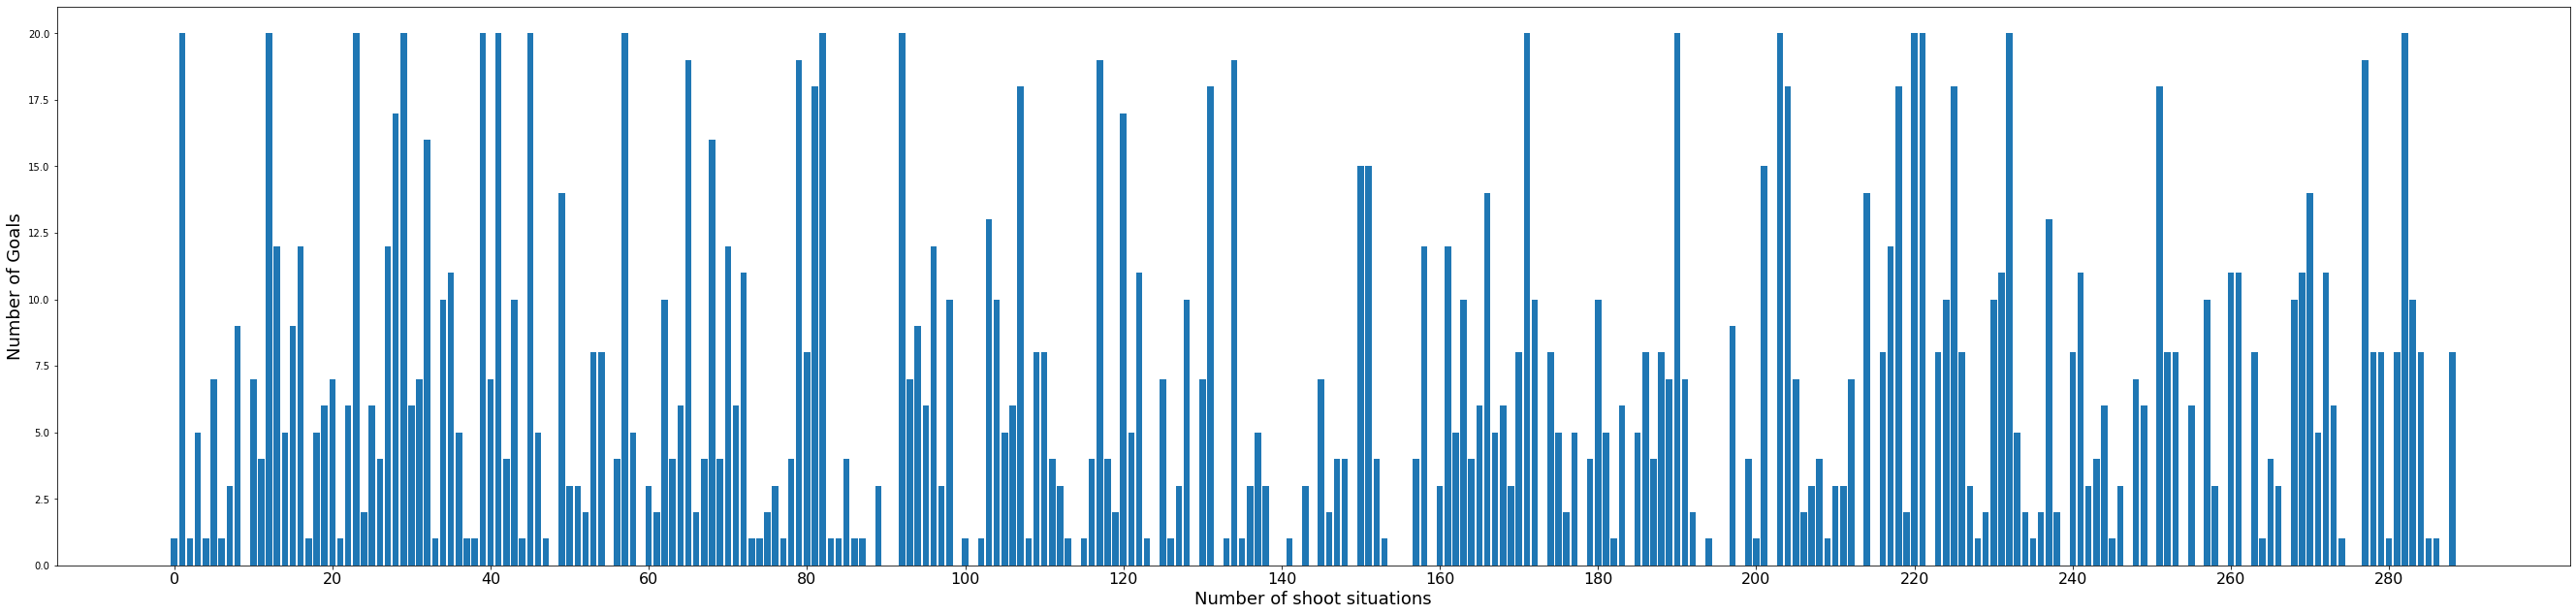

cyrus


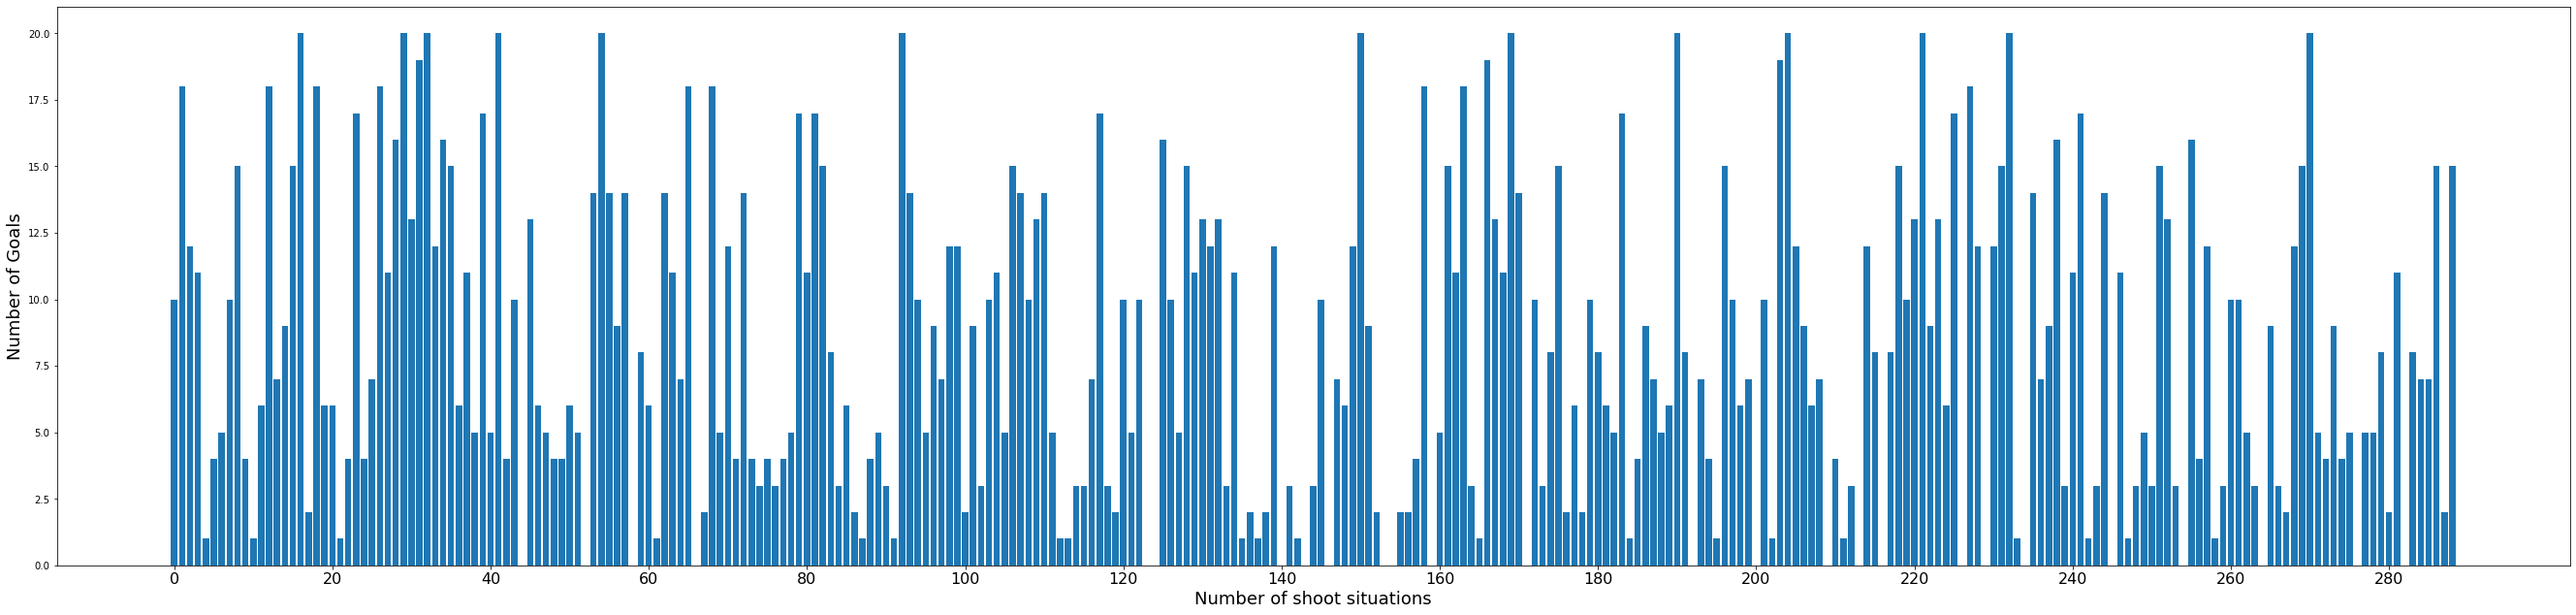

helios


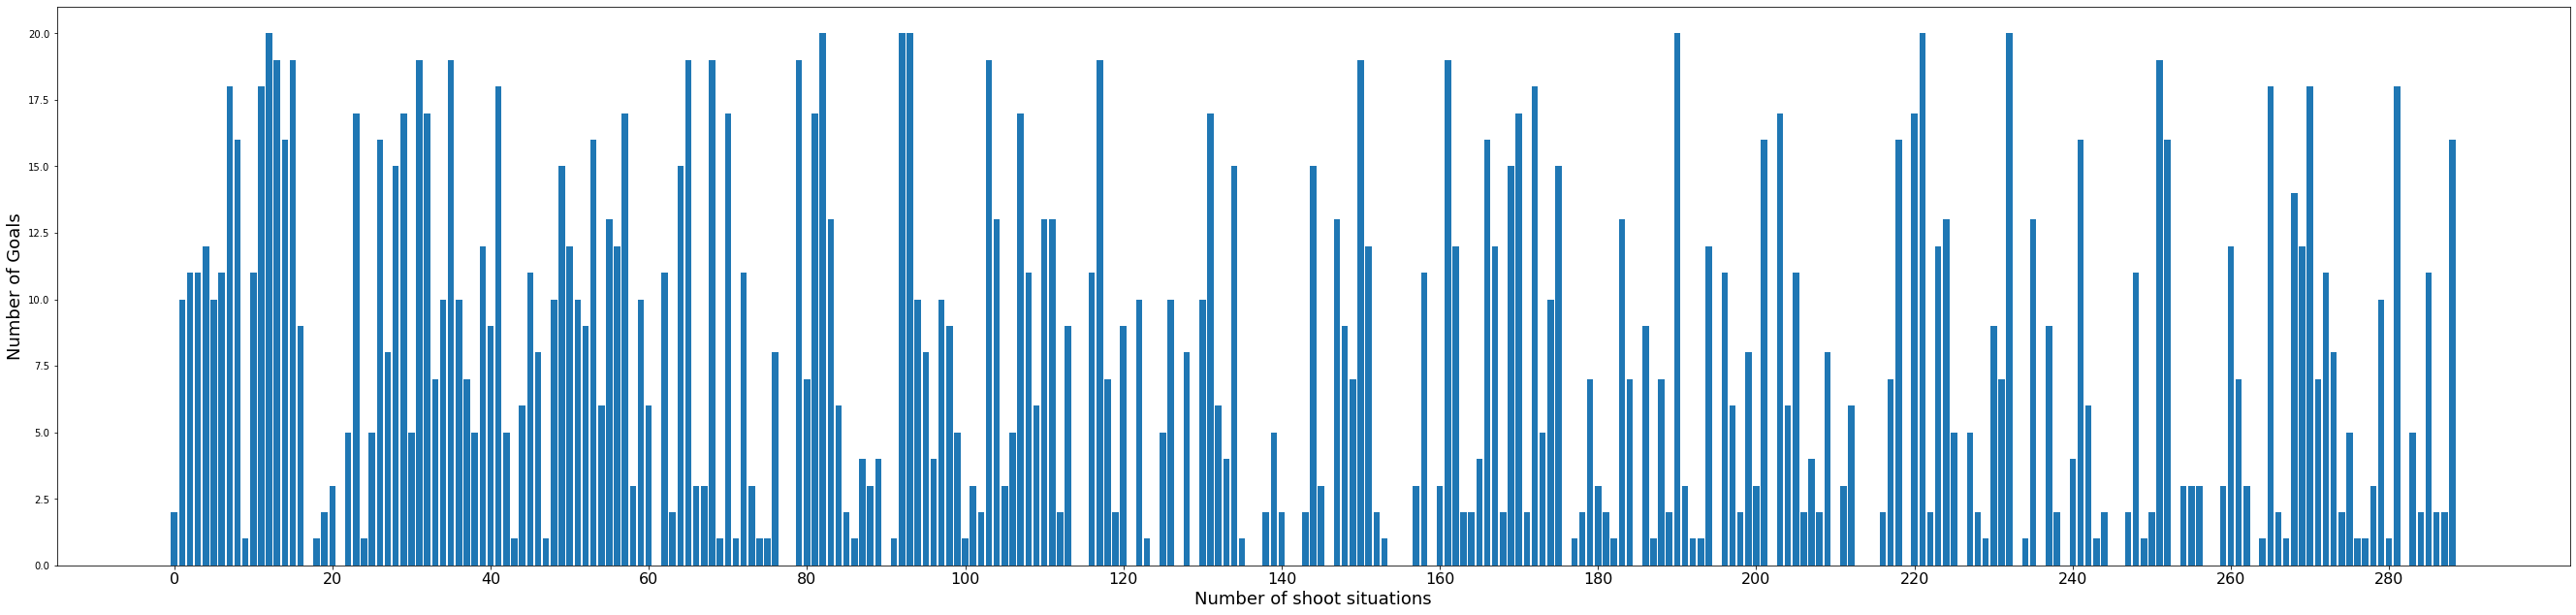

yushan


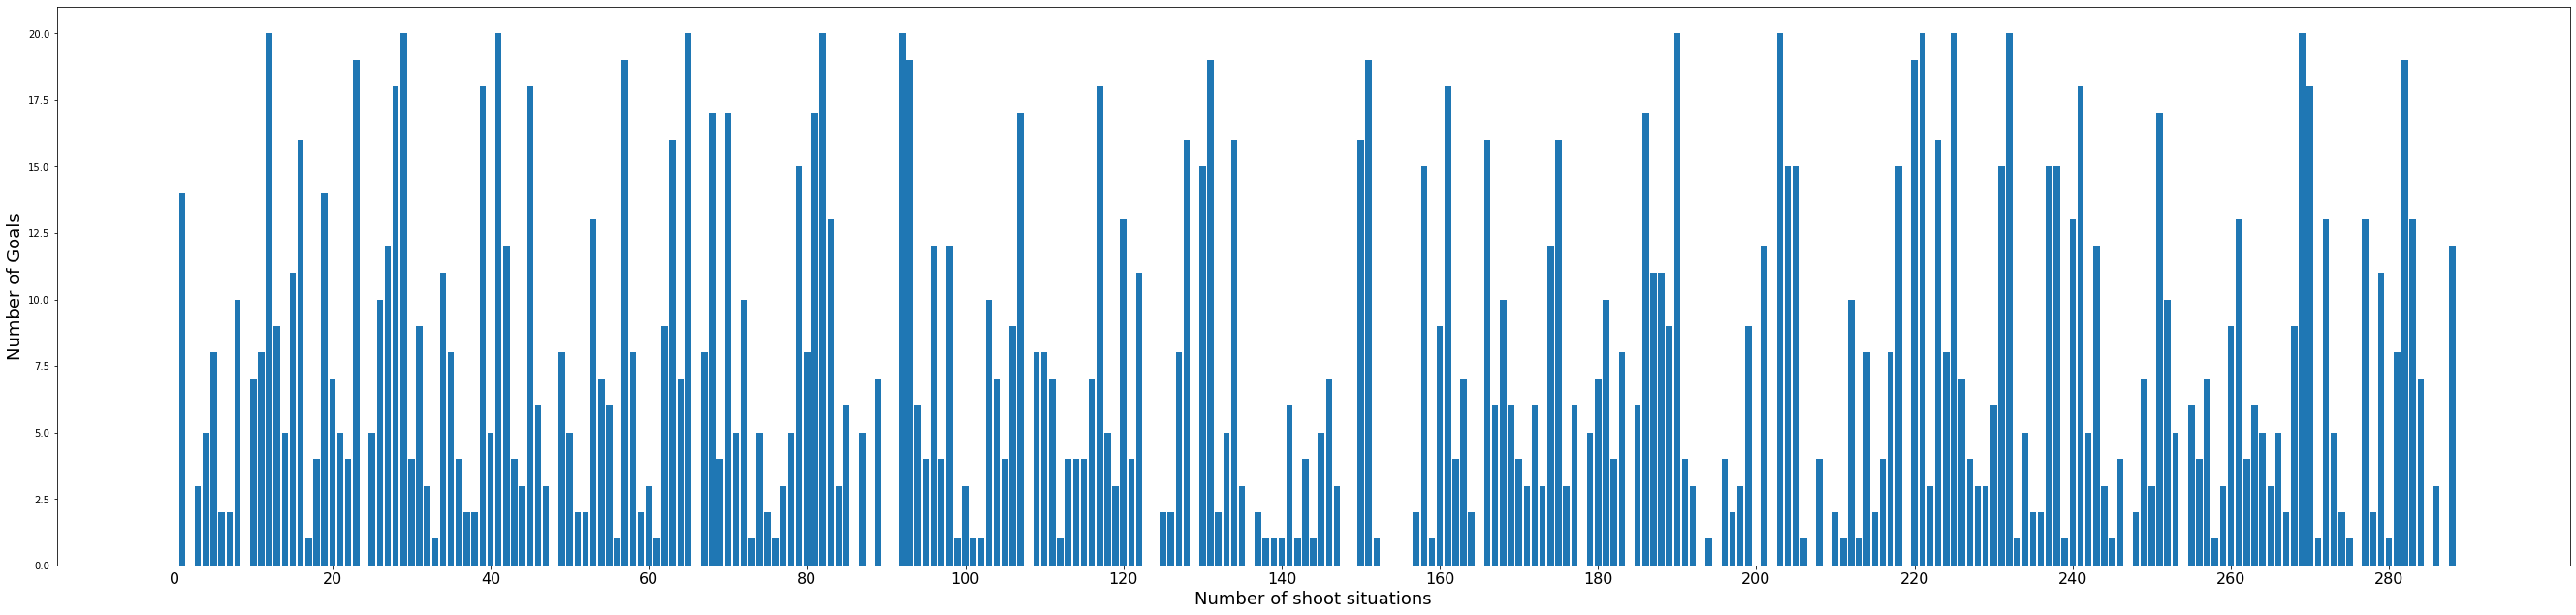

In [7]:
for teams in Path(DATASET_PATH).glob('*'):
    print(teams.stem)
    fig = plt.figure()
    ax = fig.add_axes([1,1,6,2])
    total_situation = [i for i, _ in enumerate(list(range(0, 289)))]
    goals = resultDictinary[teams.stem].values()
    ax.bar(total_situation, goals)
    plt.xticks(np.arange(min(total_situation), max(total_situation) + 1, 20.0), fontsize = 16)
    plt.xlabel("Number of shoot situations", fontsize = 18)
    plt.ylabel("Number of Goals", fontsize = 18)
    plt.show()

CHECK THE TEAMS PERFORMANCE IN THEIR OWN SHOOT SITUATATIONS

In [8]:
def getColors(inputPathColors, Rteam):
    colors = []
    total = 0
    count = 0
    for log_file in Path(inputPathColors).glob('**/*.rcg'):
            situation = str(log_file.parents[0]).split('/')[-1]
            team = situation.split('-')[-4].split('_')[-2].split('2')[0]
            colors.append('blue') if team.lower() == Rteam else colors.append('grey')
    return colors

/home/pavan/Documents/SERVER-2/Logs/dataset/result-new/mt


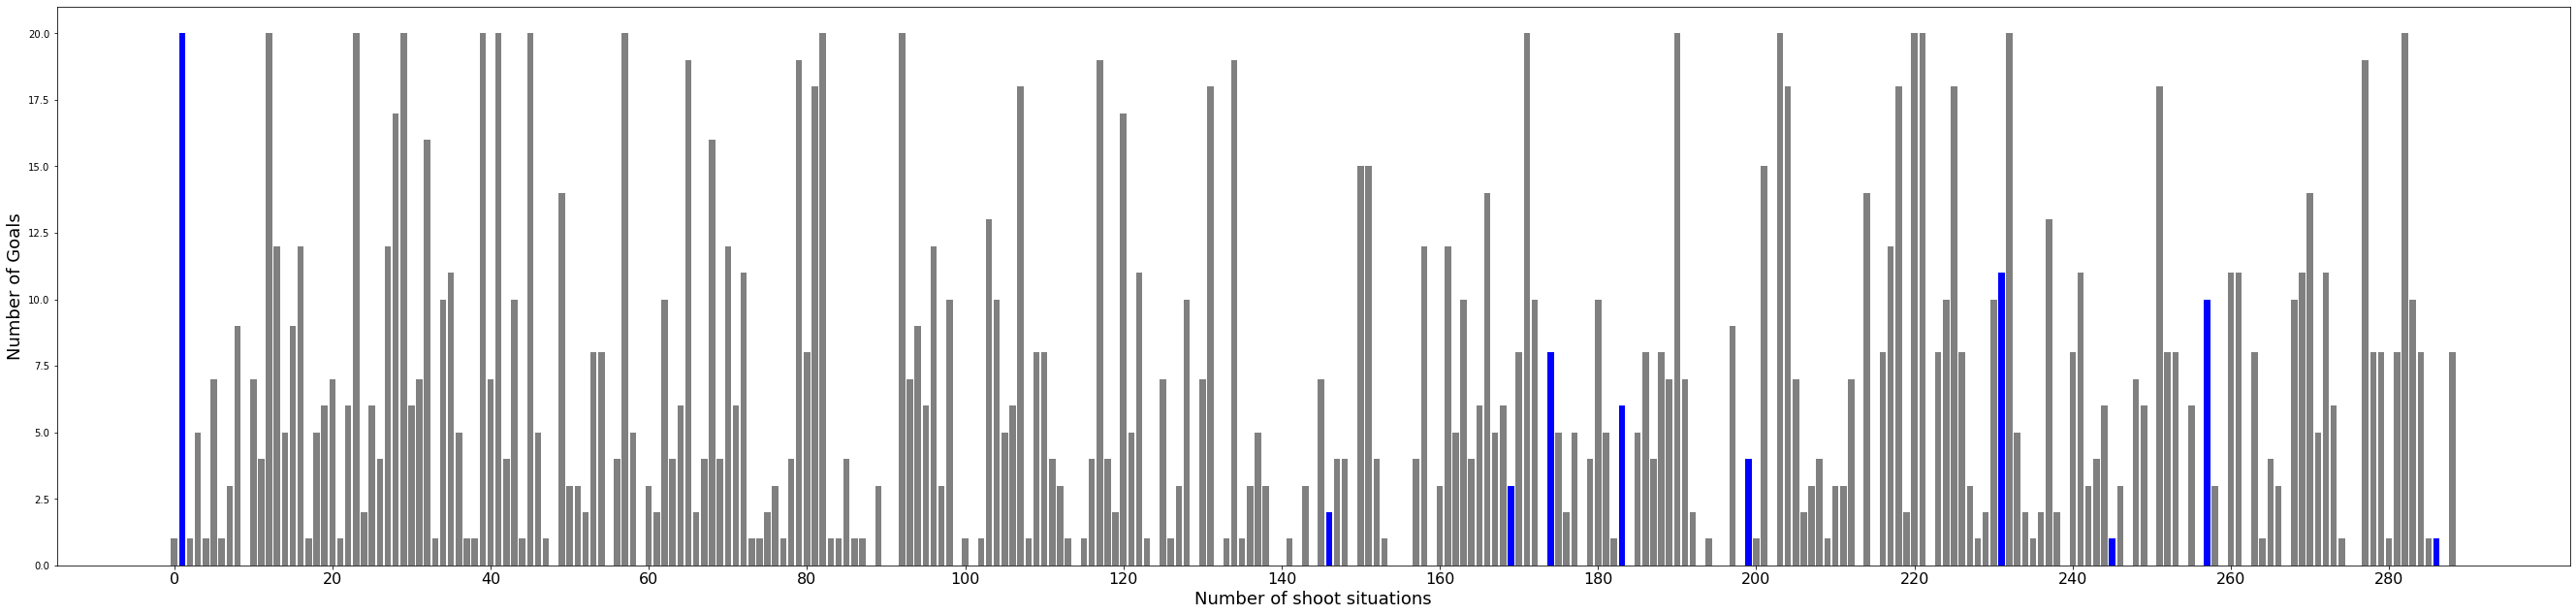

/home/pavan/Documents/SERVER-2/Logs/dataset/result-new/cyrus


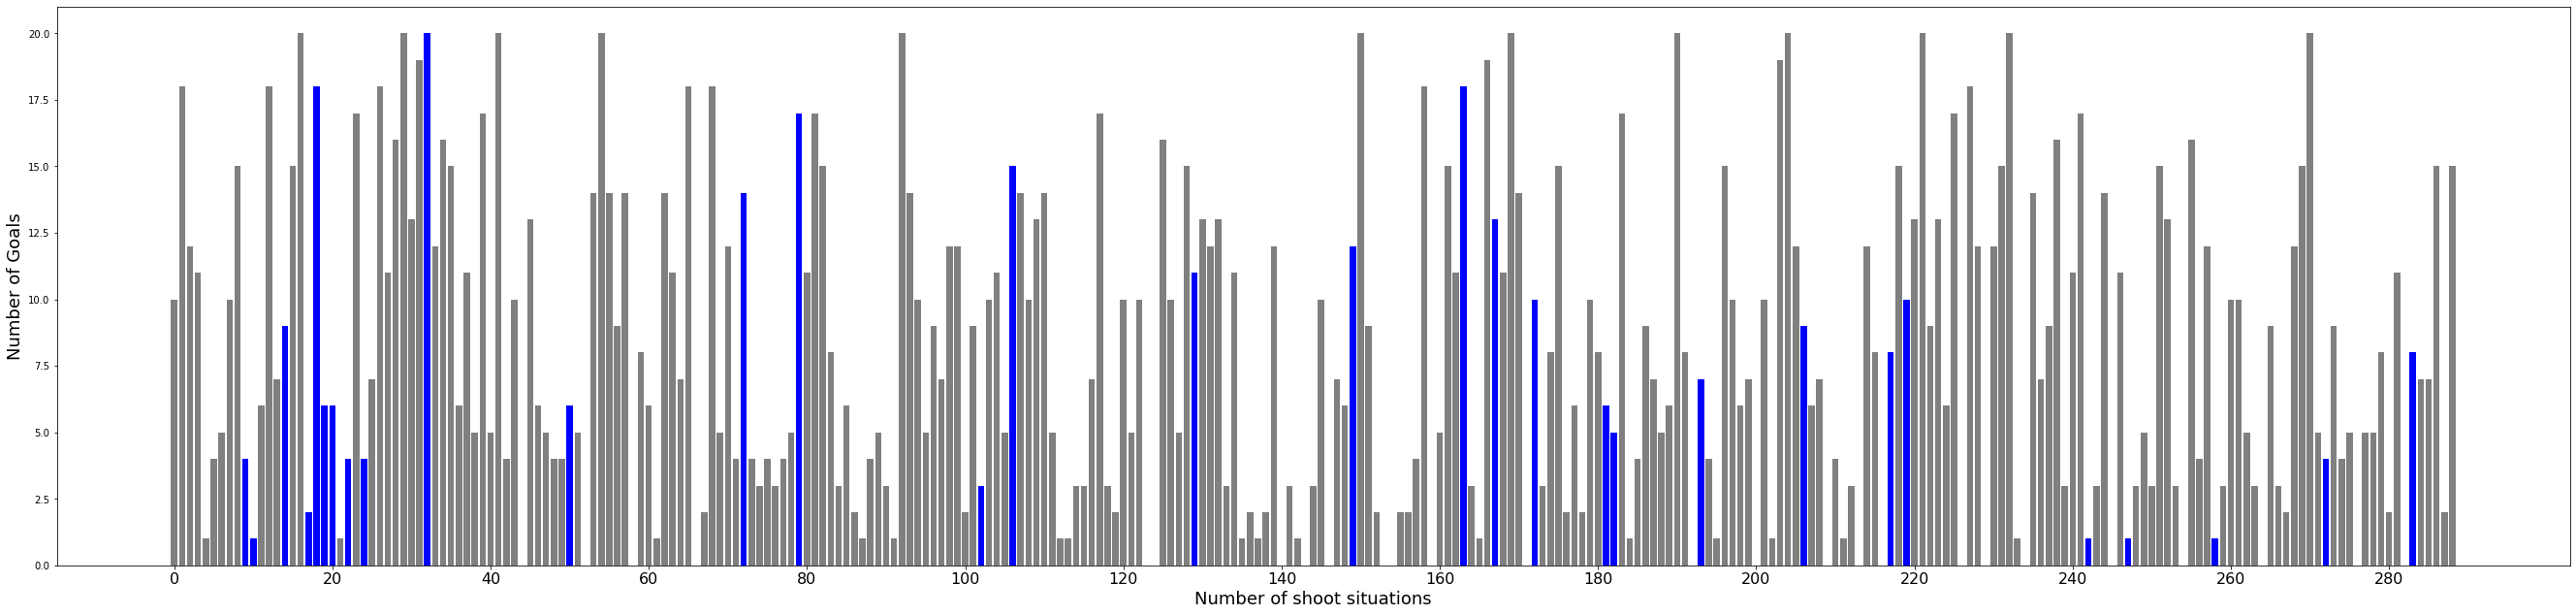

/home/pavan/Documents/SERVER-2/Logs/dataset/result-new/helios


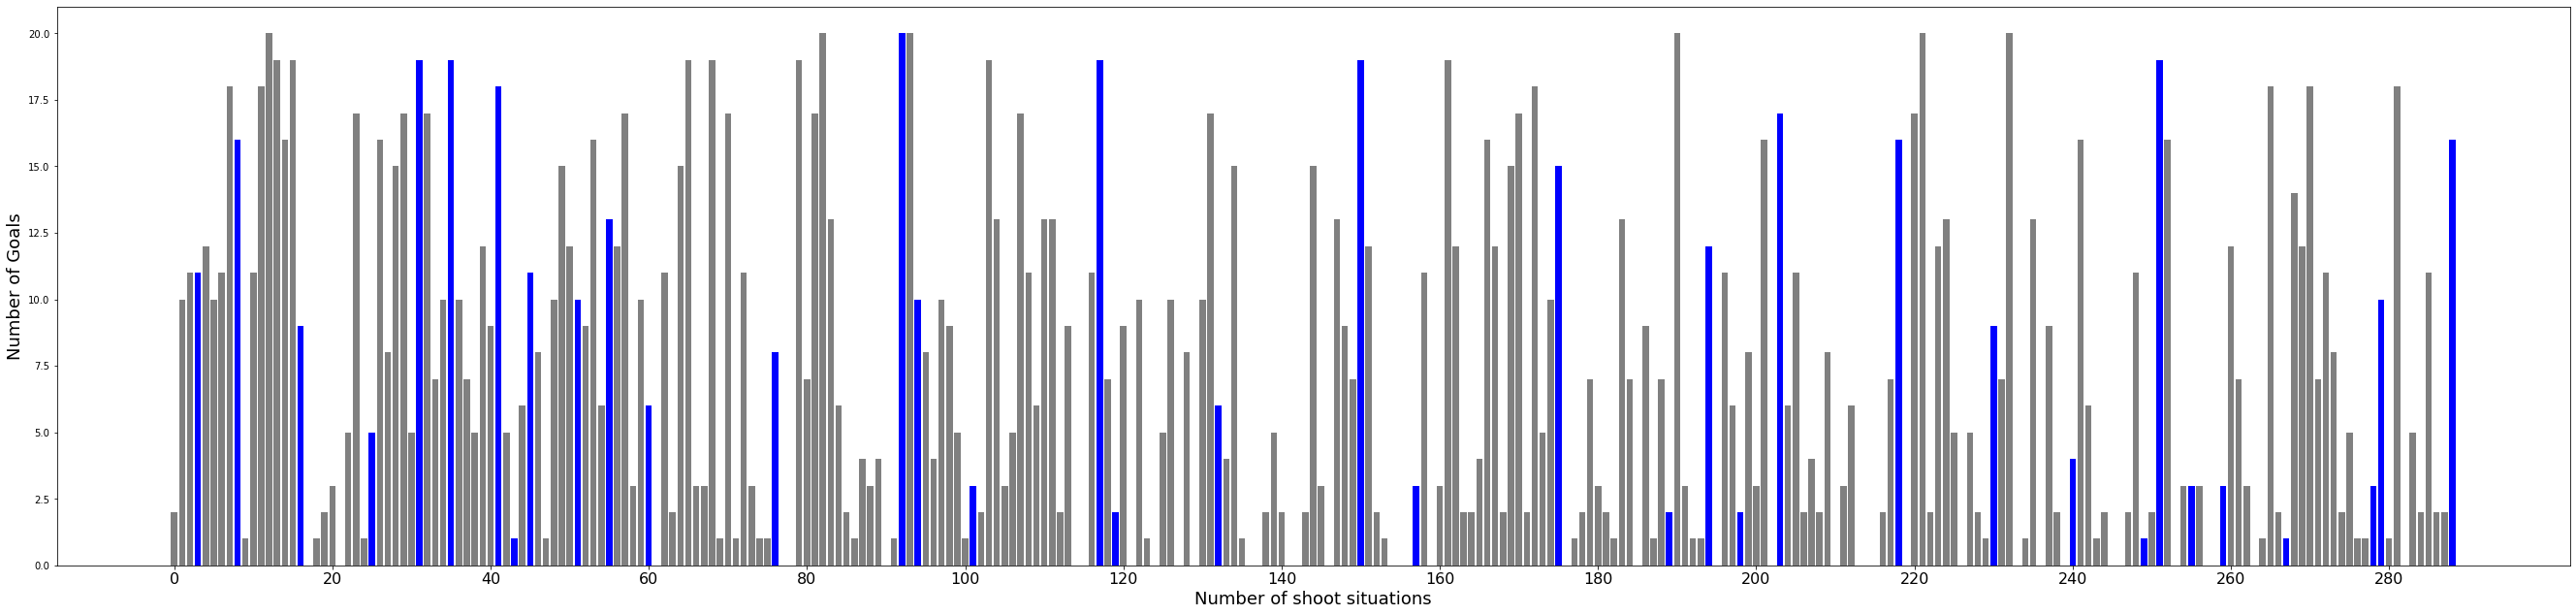

/home/pavan/Documents/SERVER-2/Logs/dataset/result-new/yushan


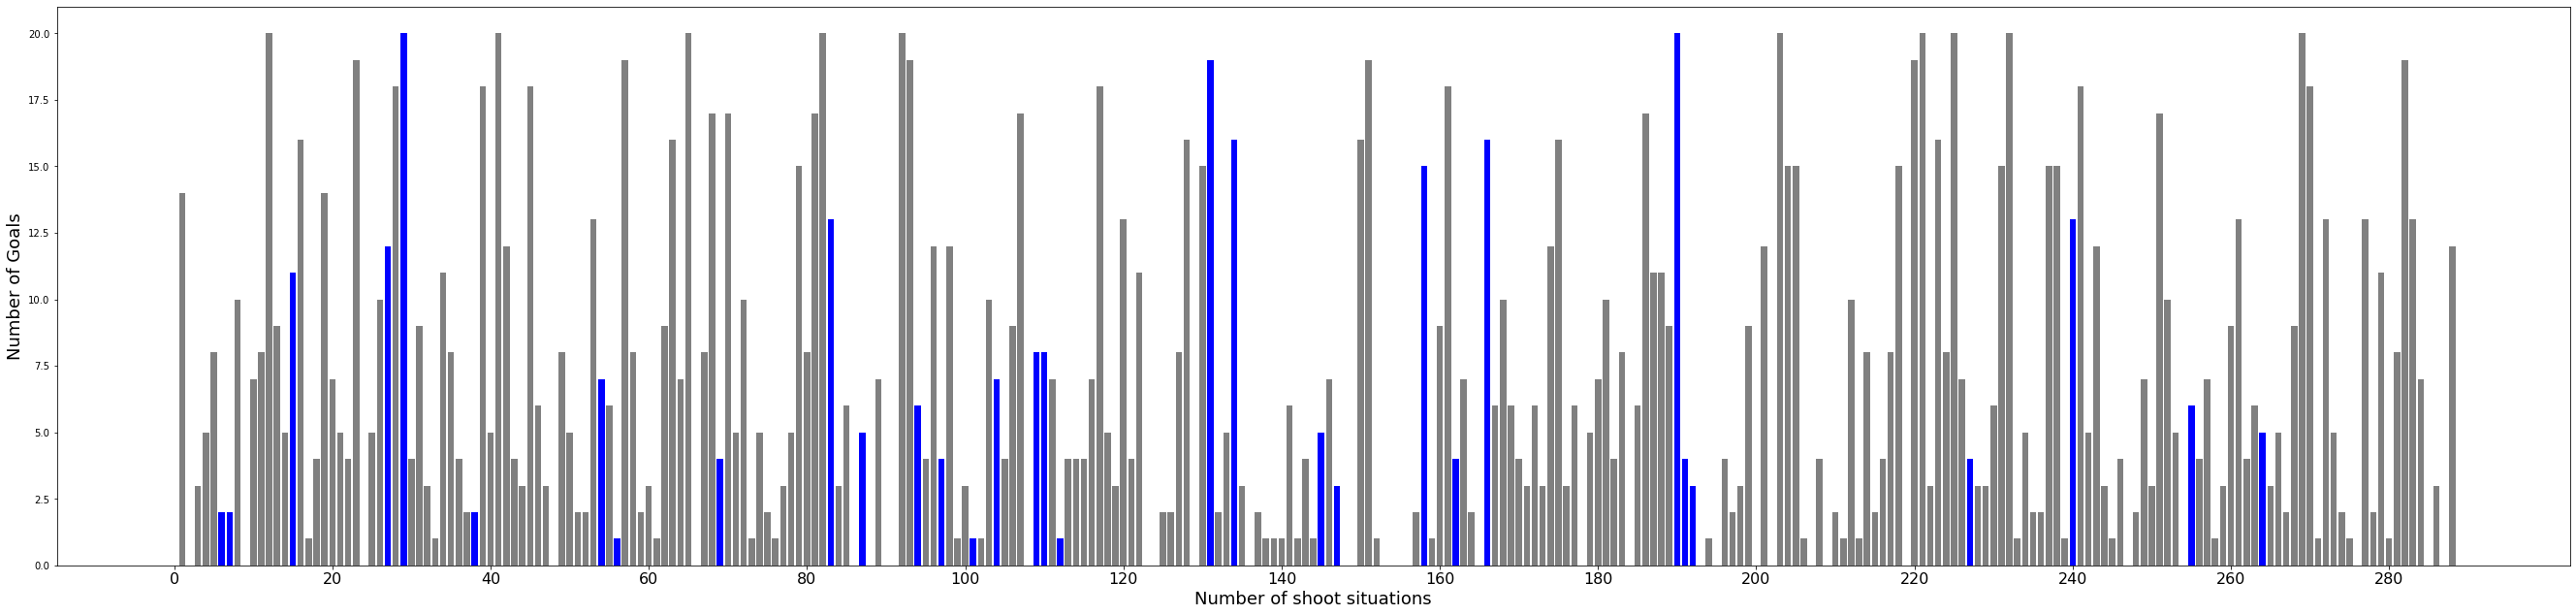

In [9]:
for teams in Path(DATASET_PATH).glob('*'):
    print(teams)
    fig = plt.figure()
    ax = fig.add_axes([1,1,6,2])
    total_situation = [i for i, _ in enumerate(list(range(0, 289)))]
    goals = resultDictinary[teams.stem].values()
    ax.bar(total_situation, goals, color = getColors(DATASET_PATH + teams.stem, teams.stem))
    # leg = ax.legend()
    plt.xticks(np.arange(min(total_situation), max(total_situation) + 1, 20.0), fontsize = 16)
    plt.xlabel("Number of shoot situations", fontsize = 18)
    plt.ylabel("Number of Goals", fontsize = 18)
    # fig1.savefig(CURRENT_PATH + '/Bar-graphs/'+ teams.stem+'_bar.png', dpi = 1000)
    plt.show()
    

In [10]:
for teamname in Path(DATASET_PATH).glob('*'):
    logfile_path = DATASET_PATH + teamname.stem
    count = 0
    total = 0
    for log_file in Path(logfile_path).glob('**/*.rcg'):
        situation = str(log_file.parents[0]).split('/')[-1]
        team = situation.split('-')[-4].split('_')[-2].split('2')[0]
        if(team.lower() == teamname.stem):
            count += 1 if check_for_goal(log_file) else 0
            total += 1
    print (teamname.stem, count, total, (count/total)*100)

mt 66 217 30.414746543778804
cyrus 219 660 33.18181818181819
helios 322 979 32.89070480081716
yushan 288 755 38.145695364238414


DETERMINE THE EASY SHOOT SITUATION AND HARD SHOOT SITUATIONS

In [11]:
resultDictinary['helios']['MainRound-GroupL-20190706103326-Ri-one_0-vs-HillStone_3-R-shootsituation-1']

19

In [12]:
easy_situations_list = []
hard_situations_list = []
for i in resultDictinary['cyrus'].keys():
    if(resultDictinary['helios'][i] >= 17 and resultDictinary['cyrus'][i] >= 17 and resultDictinary['mt'][i] >= 17 and resultDictinary['yushan'][i] >= 17):
        easy_situations_list.append(i)
    elif(resultDictinary['helios'][i] <= 2 and resultDictinary['cyrus'][i] <= 2 and resultDictinary['mt'][i] <= 2 and resultDictinary['yushan'][i] <= 2):
        hard_situations_list.append(i) 
print("easy_situations_list:",len(easy_situations_list),"\nhard_situations_list:",len(hard_situations_list))
# print(easy_situations_list)

easy_situations_list: 12 
hard_situations_list: 23


In [13]:
total_situation_goal ={}
for log_file in Path(DATASET_PATH).glob('**/*.rcg'):
    situation = str(log_file.parents[0]).split('/')[-1]
    if check_for_goal(log_file):
        if situation in total_situation_goal:
            total_situation_goal[situation] += 1
        else:
            total_situation_goal[situation] = 1
    else :
        if situation not in total_situation_goal:
            total_situation_goal[situation] = 0
    sortedSituationGoal = dict(sorted(total_situation_goal.items(), key=lambda item: item[0]))

In [14]:
def get3Colors(sortedSituationGoal):
    colors = []
    for i in sortedSituationGoal.keys():
        if(i in easy_situations_list):
            colors.append('green')
        elif(i in hard_situations_list):
            colors.append('red')
        else:
            colors.append('grey')
    return(colors)

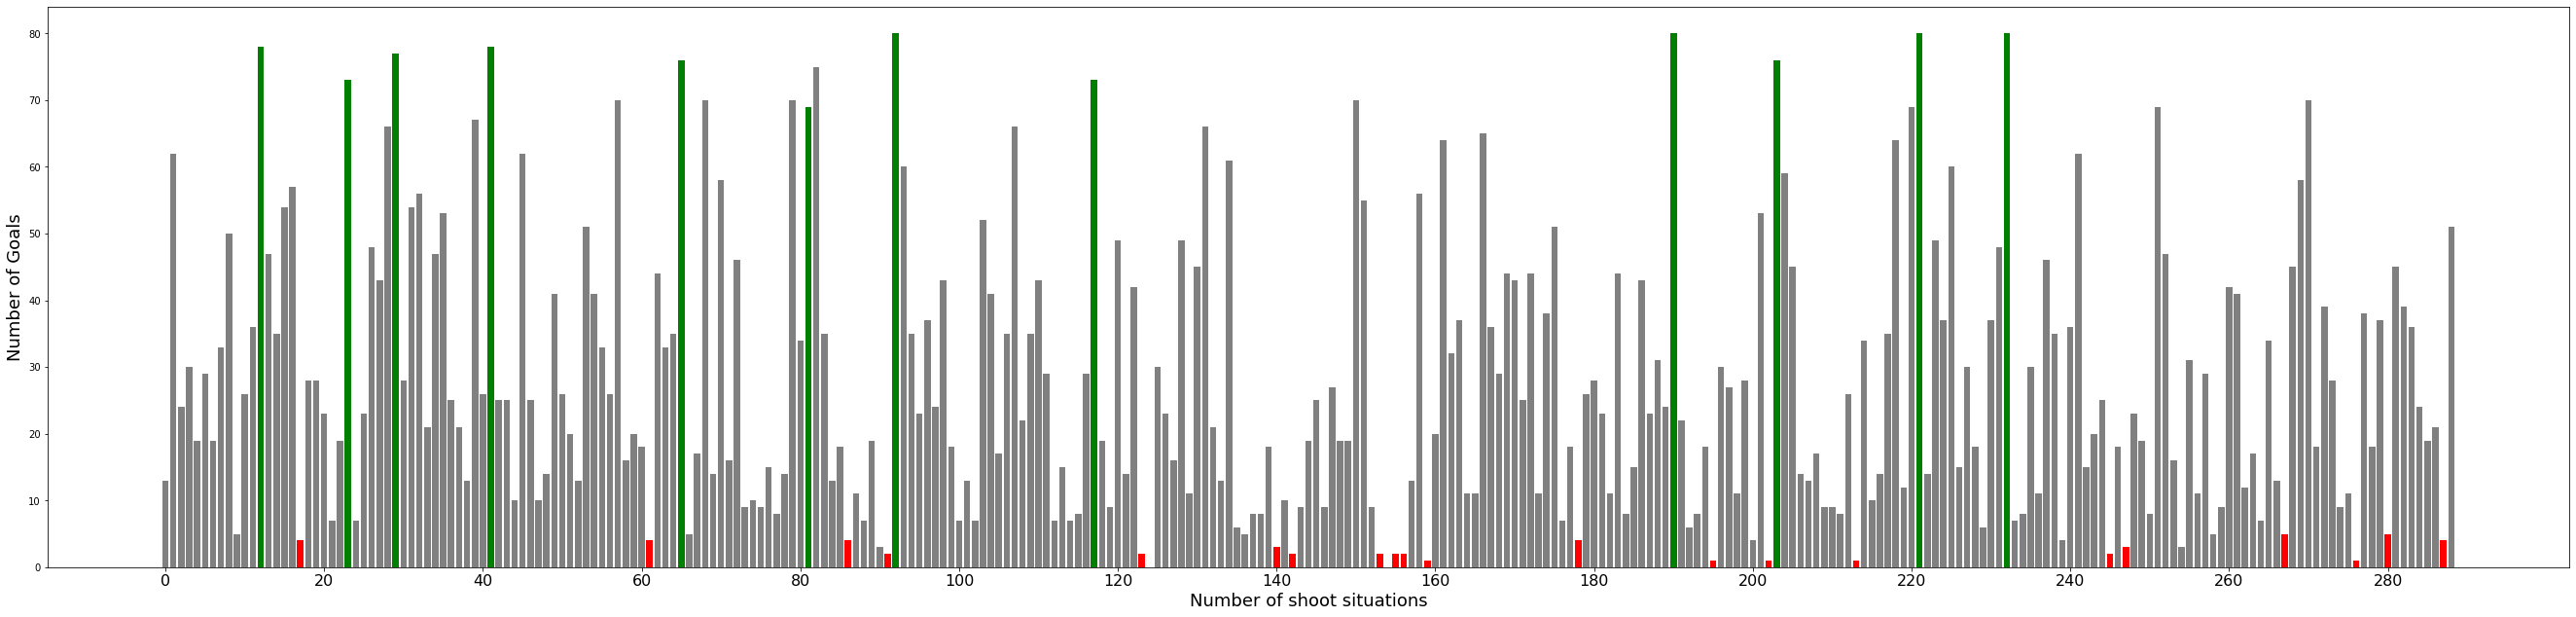

In [15]:
fig = plt.figure()
ax = fig.add_axes([1,1,6,2])
total_situation = [i for i, _ in enumerate(list(range(0, 289)))]
goals = sortedSituationGoal.values()
ax.bar(total_situation, goals, color = get3Colors(sortedSituationGoal))
plt.xticks(np.arange(min(total_situation), max(total_situation) + 1, 20.0), fontsize = 16)
plt.xlabel("Number of shoot situations", fontsize = 18)
plt.ylabel("Number of Goals", fontsize = 18)
plt.show()

To Find those situation which were not executed.

In [16]:
inputpathmt = '/home/pavan/Documents/SERVER-2/Logs/trial/result/yushan'
listOfEmptyDirs = [dirpath for (dirpath, dirnames, filenames) in os.walk(inputpathmt) if len(dirnames) == 0 and len(filenames) == 0]
print("Total non executed situations: ", len(listOfEmptyDirs) )
# print(listOfEmptyDirs)
for elem in listOfEmptyDirs:
    print(elem)

Total non executed situations:  1
/home/pavan/Documents/SERVER-2/Logs/trial/result/yushan/13/sit3-R-shootsituation-4-1


Shooting Efficiency for Situation Segregation.

In [17]:
# 'Elimination-Places-13-to-15-20190707095459-Ri-one_2-vs-ITAndroids_4-R-shootsituation-1'      sit1
# MainRound-GroupL-20190706112224-HillStone_3-vs-RoboCIn_1-R-shootsituation-4                   sit2
# MainRound-GroupL-20190706130010-Ri-one_0-vs-Titas2019_1-R-shootsituation-1                    sit3
# MainRound-GroupK-20190706093045-FRA-UNIted_1-vs-YuShan2019_1-R-shootsituation-2               sit4

inputpathmt = '/home/pavan/Documents/SERVER-2/Logs/trial/result/'
shootagregation1 = {}
for teamname in Path(inputpathmt).glob('*'):
    logfile_path = inputpathmt + teamname.stem + '/'
    cSit1 = 0   #easy situation 1
    cSit2 = 0   #hard situation 1
    cSit3 = 0   #hard situation 2
    cSit4 = 0   #easy situation 2
    tSit1 = 0
    tSit2 = 0
    tSit3 = 0
    tSit4 = 0
    resultlist = []
    for log_file in Path(logfile_path).glob('**/*.rcg'):
        situation = str(log_file.parent).split('/')[-1].split('-')[0]
        if(situation == 'sit1'):
            cSit1 += 1 if check_for_goal(log_file) else 0
            tSit1 += 1
        elif(situation == 'sit2'):
            cSit2 += 1 if check_for_goal(log_file) else 0
            tSit2 += 1
        elif(situation == 'sit3'):
            cSit3 += 1 if check_for_goal(log_file) else 0
            tSit3 += 1
        else:
            cSit4 += 1 if check_for_goal(log_file) else 0
            tSit4 += 1
    resultlist = [cSit1/tSit1,cSit2/tSit2,cSit3/tSit3,cSit4/tSit4]
    shootagregation1.update({str(teamname.stem) : resultlist})

In [18]:
shootagregation1

{'mt': [1.0, 0.01, 0.05, 0.97],
 'cyrus': [0.93, 0.06, 0.03, 0.87],
 'helios': [0.99, 0.14, 0.12, 0.95],
 'yushan': [0.98, 0.04, 0.050505050505050504, 0.9]}